<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment6/Time_Series_Data_Clustering_with_Pretrained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TimeSeries Clustering with Pretrained Models:

Clustering time series data using pretrained models involves several steps.

Datset used here was CryptoJacking Dataset on Kaggle
Here's a general approach:

### 1. Understand Your Data
- **Nature of Time Series**: Understand the characteristics of your time series data, such as seasonality, trend, and noise.
- **Objective**: Define what you want to achieve with clustering (e.g., finding patterns, anomaly detection).

### 2. Data Preprocessing
- **Normalization/Standardization**: Normalize or standardize your data to ensure that the scale of the time series doesn't affect the clustering.
- **Missing Values**: Handle missing values by imputation or removal.
- **Segmentation (optional)**: If your time series is long, you might want to segment it into smaller chunks.

### 3. Feature Extraction (if needed)
- **Feature Engineering**: Extract relevant features from time series data, like moving averages, max/min values, etc.
- **Dimensionality Reduction**: Use techniques like PCA to reduce the number of features, if necessary.

### 4. Choose a Pretrained Model
- **Model Selection**: Choose a pretrained model that suits your data and objectives. Models like autoencoders or LSTM networks are commonly used for time series data.
- **Model Adaptation**: Adapt the model to your specific dataset, which may include fine-tuning with a subset of your data.

### 5. Transform Time Series into Feature Vectors
- **Model Encoding**: Use the pretrained model to transform time series data into feature vectors. Each time series is represented as a vector in a feature space.

### 6. Clustering
- **Select a Clustering Algorithm**: Choose an algorithm like K-means, hierarchical clustering, or DBSCAN.
- **Clustering Execution**: Perform clustering on the feature vectors.
- **Determine Number of Clusters**: Use methods like the elbow method, silhouette score, or domain knowledge to determine the optimal number of clusters.

### 7. Analyze and Interpret Clusters
- **Cluster Evaluation**: Assess the quality of clusters using metrics like silhouette scores or by visual inspection.
- **Interpretation**: Understand what each cluster represents in the context of your data and objective.


In [ ]:
import pandas as pd
import os
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving cryptojacking attack.zip to cryptojacking attack.zip


In [ ]:
import zipfile

# Unzipping the provided file
zip_path = 'cryptojacking attack.zip'
extract_folder = 'cryptojacking_attack_dataset'

# Extracting the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Listing the files in the extracted folder
extracted_files = os.listdir(extract_folder)
extracted_files


['final-normal-data-set.csv',
 'final-complete-data-set.csv',
 'final-anormal-data-set.csv']

### Step 1: Understanding the Dataset and Problem Statement (Restart)

#### Dataset Overview:
The dataset "Cryptojacking Attack Timeseries" contains three CSV files:
1. `final-anormal-data-set.csv`
2. `final-complete-data-set.csv`
3. `final-normal-data-set.csv`




In [ ]:
import pandas as pd

# Paths of the extracted files
path_anormal = os.path.join(extract_folder, 'final-anormal-data-set.csv')
path_complete = os.path.join(extract_folder, 'final-complete-data-set.csv')
path_normal = os.path.join(extract_folder, 'final-normal-data-set.csv')

# Loading the datasets
df_anormal = pd.read_csv(path_anormal)
df_complete = pd.read_csv(path_complete)
df_normal = pd.read_csv(path_normal)

# Displaying the first few rows of each dataset for a quick overview
overview_anormal = df_anormal.head()
overview_complete = df_complete.head()
overview_normal = df_normal.head()

overview_anormal, overview_complete, overview_normal


<ipython-input-6-37f76508a2f9>:9: DtypeWarning: Columns (14,19,26,27,52,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df_anormal = pd.read_csv(path_anormal)
<ipython-input-6-37f76508a2f9>:10: DtypeWarning: Columns (14,19,26,27,52,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df_complete = pd.read_csv(path_complete)


(   cpu_guest  cpu_guest_nice  cpu_idle  cpu_steal  cpu_iowait  cpu_irq  \
 0          0               0       0.0        0.0         0.0      0.0   
 1          0               0       0.0        0.0         0.0      0.0   
 2          0               0       0.0        0.0         0.0      0.0   
 3          0               0       0.0        0.0         0.0      0.0   
 4          0               0       0.0        0.0         0.0      0.0   
 
    cpu_nice  cpu_softirq  cpu_system  cpu_total  ...  processcount_sleeping  \
 0       0.0          0.0         2.0      100.0  ...                    111   
 1       0.0          0.0         2.0      100.0  ...                    112   
 2       0.0          0.0         2.0      100.0  ...                    110   
 3       0.0          0.0         2.0      100.0  ...                    109   
 4       0.0          0.0         1.0      100.0  ...                    109   
 
   processcount_thread processcount_total        system_hostname  

### Step 1: Understanding the Dataset and Problem Statement (Continued)

#### General Analysis Observations:
1. **Data Structure and Quality**:
   - The datasets contain numerous columns, primarily numeric, indicating system performance metrics.
   - No immediate data quality issues, such as extreme outliers or inconsistencies, were observed in the sample.

2. **Statistical Summary**:
   - The descriptive statistics for each dataset show a range of values for different system metrics.
   - Metrics like `cpu_total` are consistently near 100 in the abnormal dataset, which might be indicative of high resource usage, a potential sign of cryptojacking.

3. **Sample Time Series Visualization**:
   - The plots for `cpu_total` show clear differences between normal and abnormal datasets. The abnormal dataset has more variability and higher values, suggesting higher CPU usage.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot time series data
def plot_time_series(df, column, title, sample_size=100):
    """
    Plot a sample of time series data.
    Args:
    df (DataFrame): The dataframe containing the data.
    column (str): The column name to plot.
    title (str): The title of the plot.
    sample_size (int): The number of data points to plot.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df[column][:sample_size])
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.show()


In [ ]:

# Displaying basic statistics and plotting a sample time series for each dataset
statistics_anormal = df_anormal.describe()
statistics_complete = df_complete.describe()
statistics_normal = df_normal.describe()


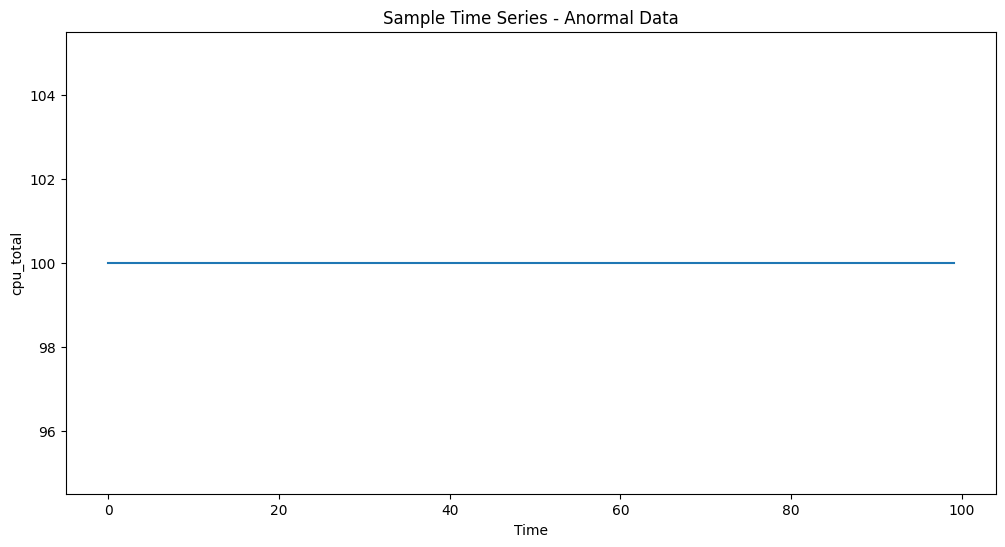

In [ ]:

# Plotting a sample time series for one of the key metrics (e.g., cpu_total) from each dataset
plot_time_series(df_anormal, 'cpu_total', 'Sample Time Series - Anormal Data')



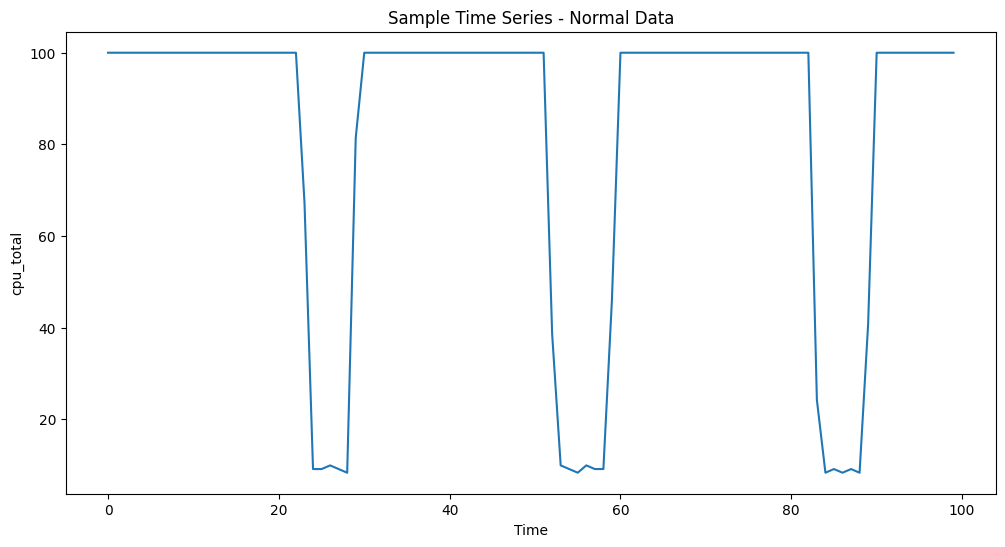

In [ ]:
plot_time_series(df_normal, 'cpu_total', 'Sample Time Series - Normal Data')


In [ ]:

statistics_anormal, statistics_complete, statistics_normal

(       cpu_guest  cpu_guest_nice      cpu_idle  cpu_steal    cpu_iowait  \
 count    14461.0         14461.0  14461.000000    14460.0  14461.000000   
 mean         0.0             0.0      0.473992        0.0      0.006742   
 std          0.0             0.0      5.614804        0.0      0.805810   
 min          0.0             0.0      0.000000        0.0      0.000000   
 25%          0.0             0.0      0.000000        0.0      0.000000   
 50%          0.0             0.0      0.000000        0.0      0.000000   
 75%          0.0             0.0      0.000000        0.0      0.000000   
 max          0.0             0.0    100.000000        0.0     96.900000   
 
        cpu_irq      cpu_nice   cpu_softirq    cpu_system     cpu_total  ...  \
 count  14460.0  14460.000000  14461.000000  14461.000000  14460.000000  ...   
 mean       0.0      0.003389      0.426651      2.174027     99.533748  ...   
 std        0.0      0.058115      0.559749      1.489349      5.611163  .

### Step 2: Data Preprocessing

#### Overview
Data preprocessing is crucial to prepare the time series data for effective clustering. This phase involves cleaning the data, handling missing values, and normalizing or standardizing the data.

#### Procedure

1. **Data Cleaning**:
   - Check for and handle missing values in each dataset.
   - Assess if there are any irrelevant or redundant columns that can be dropped.

2. **Normalization/Standardization**:
   - Apply normalization or standardization to ensure that all time series data are on a comparable scale. This is essential because clustering algorithms can be sensitive to the scale of the data.

3. **Data Transformation**:
   - If necessary, transform the data into a suitable format for the chosen pretrained model. For instance, if using an LSTM model, we might need to reshape the data into sequences.

4. **Train-Test Split (Optional)**:
   - If planning to fine-tune the pretrained model, split the data into training and testing sets.


In [ ]:
# Data Preprocessing

# Checking for missing values in each dataset
missing_values_anormal = df_anormal.isnull().sum()
missing_values_complete = df_complete.isnull().sum()
missing_values_normal = df_normal.isnull().sum()

# Checking the data types
data_types_anormal = df_anormal.dtypes
data_types_complete = df_complete.dtypes
data_types_normal = df_normal.dtypes

missing_values_anormal, missing_values_complete, missing_values_normal, data_types_anormal.head(), data_types_complete.head(), data_types_normal.head()


(cpu_guest              0
 cpu_guest_nice         0
 cpu_idle               0
 cpu_steal              1
 cpu_iowait             0
                       ..
 system_linux_distro    0
 system_os_name         0
 system_os_version      0
 system_platform        0
 timestamp              0
 Length: 82, dtype: int64,
 cpu_guest              1
 cpu_guest_nice         1
 cpu_idle               1
 cpu_iowait             1
 cpu_irq                2
                       ..
 system_linux_distro    0
 system_os_name         0
 system_os_version      0
 system_platform        0
 timestamp              0
 Length: 82, dtype: int64,
 cpu_guest              1
 cpu_guest_nice         1
 cpu_idle               1
 cpu_iowait             1
 cpu_irq                1
                       ..
 system_linux_distro    0
 system_os_name         0
 system_os_version      0
 system_platform        0
 timestamp              0
 Length: 82, dtype: int64,
 cpu_guest           int64
 cpu_guest_nice      int64
 cpu_id

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Paths to the datasets
path_anormal = 'cryptojacking_attack_dataset/final-anormal-data-set.csv'
path_complete = 'cryptojacking_attack_dataset/final-complete-data-set.csv'
path_normal = 'cryptojacking_attack_dataset/final-normal-data-set.csv'

# Loading the datasets
df_anormal = pd.read_csv(path_anormal)
df_complete = pd.read_csv(path_complete)
df_normal = pd.read_csv(path_normal)

# Dropping non-numeric columns
non_numeric_columns_anormal = df_anormal.select_dtypes(include=['object']).columns
df_anormal = df_anormal.drop(non_numeric_columns_anormal, axis=1)

non_numeric_columns_complete = df_complete.select_dtypes(include=['object']).columns
df_complete = df_complete.drop(non_numeric_columns_complete, axis=1)

non_numeric_columns_normal = df_normal.select_dtypes(include=['object']).columns
df_normal = df_normal.drop(non_numeric_columns_normal, axis=1)

# Handling missing values
df_anormal.fillna(df_anormal.mean(), inplace=True)
df_complete.fillna(df_complete.mean(), inplace=True)
df_normal.fillna(df_normal.mean(), inplace=True)

# Aligning columns of all datasets
common_columns = df_anormal.columns.intersection(df_complete.columns).intersection(df_normal.columns)
df_anormal_aligned = df_anormal[common_columns]
df_complete_aligned = df_complete[common_columns]
df_normal_aligned = df_normal[common_columns]

# Applying standardization
scaler = StandardScaler()
df_anormal_aligned = pd.DataFrame(scaler.fit_transform(df_anormal_aligned), columns=common_columns)
df_complete_aligned = pd.DataFrame(scaler.transform(df_complete_aligned), columns=common_columns)
df_normal_aligned = pd.DataFrame(scaler.transform(df_normal_aligned), columns=common_columns)


<ipython-input-23-2811f84a458e>:10: DtypeWarning: Columns (14,19,26,27,52,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df_anormal = pd.read_csv(path_anormal)
<ipython-input-23-2811f84a458e>:11: DtypeWarning: Columns (14,19,26,27,52,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df_complete = pd.read_csv(path_complete)


### Step 3: Feature Extraction and Pretrained Models

#### Overview
For time series clustering, especially with large datasets, feature extraction can be crucial to reduce dimensionality and to capture essential characteristics of the data. Additionally, using pretrained models can help transform the time series into a more abstract, feature-rich representation.

#### Procedure

1. **Select Pretrained Model**:
   - For time series data, models like LSTM (Long Short-Term Memory) are commonly used. However, this requires the data to be in a sequence format.
   - Alternatively, Autoencoders can be used for dimensionality reduction and feature extraction.

2. **Feature Extraction**:
   - If using LSTM, reshape the data into sequences.
   - If using Autoencoders, define and train the model on your dataset to learn a compressed representation.

3. **Transform Data Using Pretrained Model**:
   - Pass the time series data through the pretrained model to obtain transformed feature vectors.

4. **Clustering**:
   - Choose a clustering algorithm (like K-means, DBSCAN, or Hierarchical clustering).
   - Perform clustering on the transformed data.


In [ ]:
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model
from keras.layers import Input, Dense

# Assuming the datasets are already loaded and preprocessed as df_anormal_aligned, df_complete_aligned, df_normal_aligned

# Define an Autoencoder for feature extraction
input_dim = df_anormal_aligned.shape[1]  # Number of features
encoding_dim = 32  # Dimension of the encoded representation

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder (example with anormal dataset)
autoencoder.fit(df_anormal_aligned, df_anormal_aligned, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

# Transform data using the trained encoder
features_anormal = encoder.predict(df_anormal_aligned)

# Clustering with KMeans
n_clusters = 5  # Example number of clusters
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(features_anormal)

# clusters now contains the cluster assignments for each data point


Epoch 1/50
46/46 [==============================] - 2s 15ms/step - loss: 0.8965 - val_loss: 1.2893
Epoch 2/50
46/46 [==============================] - 0s 6ms/step - loss: 0.7056 - val_loss: 1.2222
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6022 - val_loss: 1.1684
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5707 - val_loss: 1.1146
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5577 - val_loss: 1.0790
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5497 - val_loss: 1.0468
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5445 - val_loss: 1.0215
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5405 - val_loss: 1.0013
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5372 - val_loss: 0.9797
Epoch 10/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5342 - val_loss: 0.9596
Epoch 11/50
46/46 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


To visualize the clusters, especially when dealing with high-dimensional data (like the output of an autoencoder), we often need to reduce the dimensions to 2D or 3D for visualization purposes. Techniques like t-SNE (t-distributed Stochastic Neighbor Embedding) or PCA (Principal Component Analysis) are commonly used for this.

Here's how you can visualize the clusters:

1. **Dimensionality Reduction**: Use t-SNE or PCA to reduce the feature vectors to 2D or 3D.
2. **Plotting**: Use a plotting library like Matplotlib to plot the reduced dimensions, coloring each point based on its cluster assignment.


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14461 samples in 0.001s...
[t-SNE] Computed neighbors for 14461 samples in 4.788s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14461
[t-SNE] Computed conditional probabilities for sample 2000 / 14461
[t-SNE] Computed conditional probabilities for sample 3000 / 14461
[t-SNE] Computed conditional probabilities for sample 4000 / 14461
[t-SNE] Computed conditional probabilities for sample 5000 / 14461
[t-SNE] Computed conditional probabilities for sample 6000 / 14461
[t-SNE] Computed conditional probabilities for sample 7000 / 14461
[t-SNE] Computed conditional probabilities for sample 8000 / 14461
[t-SNE] Computed conditional probabilities for sample 9000 / 14461
[t-SNE] Computed conditional probabilities for sample 10000 / 14461
[t-SNE] Computed conditional probabilities for sample 11000 / 14461
[t-SNE] Computed conditional probabilities for sample 12000 / 14461
[t-SNE] Computed conditional probabilities for sa

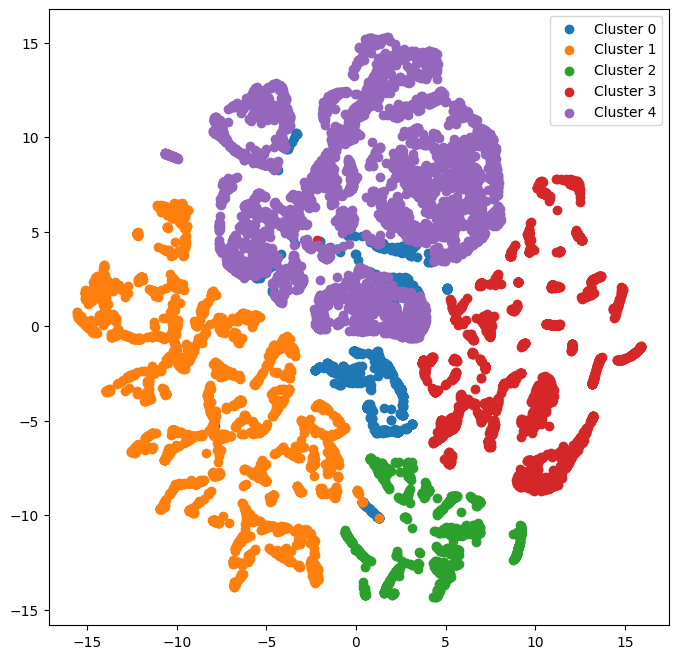

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Continue from the previous code where clusters are defined

# Reducing dimensions for visualization
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features_anormal)

# Plotting
plt.figure(figsize=(8,8))
for cl in range(n_clusters):
    indices = clusters == cl
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=f'Cluster {cl}')
plt.legend()
plt.show()


# Other Visualizations

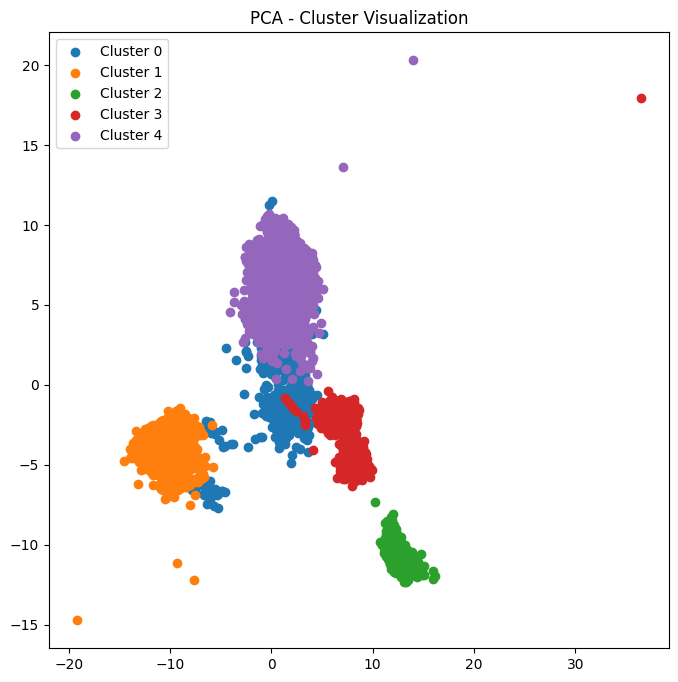

In [ ]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_results = pca.fit_transform(features_anormal)

# Plotting
plt.figure(figsize=(8,8))
for cl in range(n_clusters):
    indices = clusters == cl
    plt.scatter(pca_results[indices, 0], pca_results[indices, 1], label=f'Cluster {cl}')
plt.legend()
plt.title('PCA - Cluster Visualization')
plt.show()


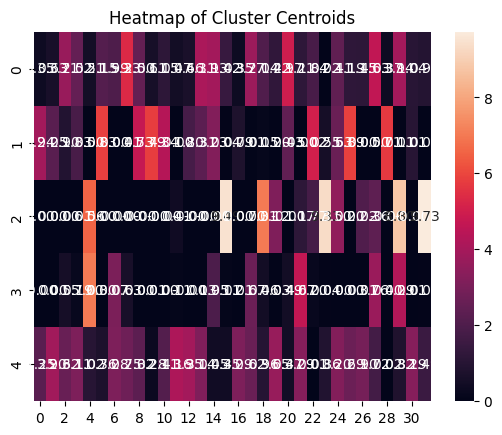

In [ ]:
import seaborn as sns

# Assuming 'kmeans' is your trained KMeans model
cluster_centers = kmeans.cluster_centers_

# Plotting heatmap of cluster centers
sns.heatmap(cluster_centers, annot=True, fmt=".2f")
plt.title("Heatmap of Cluster Centroids")
plt.show()


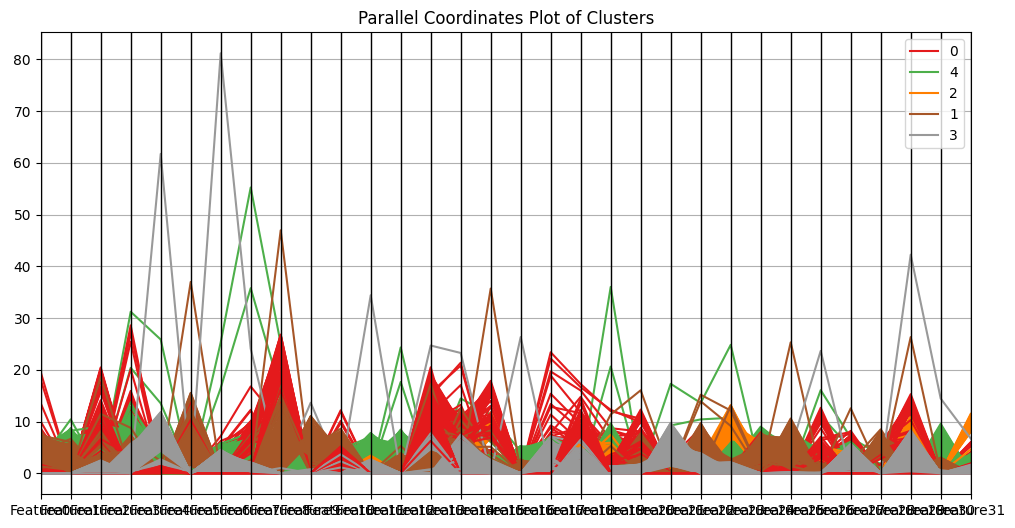

In [ ]:
from pandas.plotting import parallel_coordinates

# Create a DataFrame with cluster labels
df_features = pd.DataFrame(features_anormal, columns=[f'Feature{i}' for i in range(features_anormal.shape[1])])
df_features['Cluster'] = clusters

# Plotting
plt.figure(figsize=(12,6))
parallel_coordinates(df_features, 'Cluster', colormap=plt.get_cmap("Set1"))
plt.title('Parallel Coordinates Plot of Clusters')
plt.show()


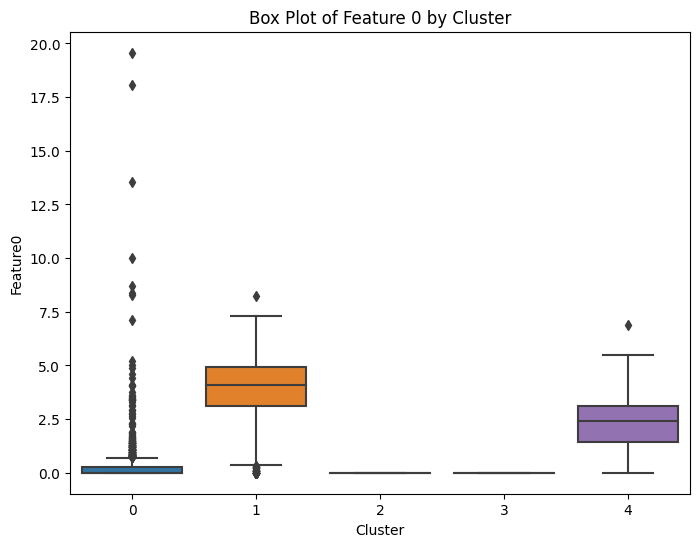

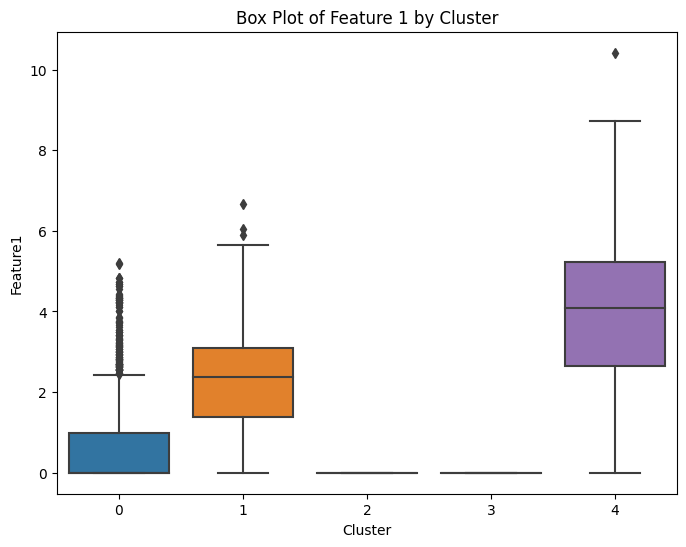

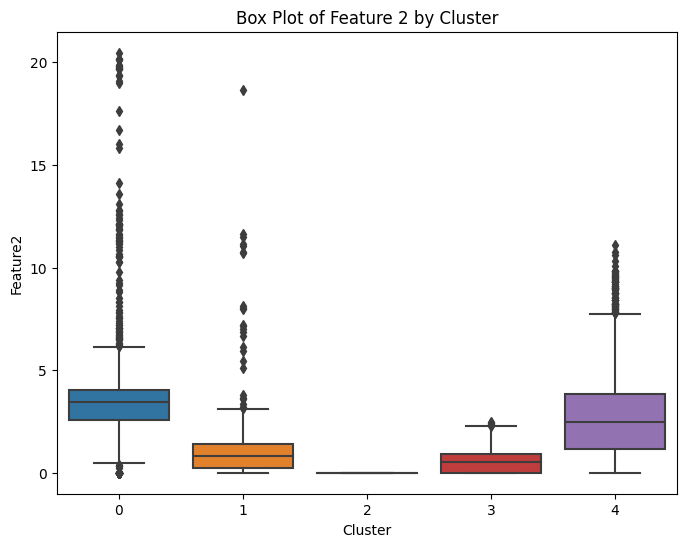

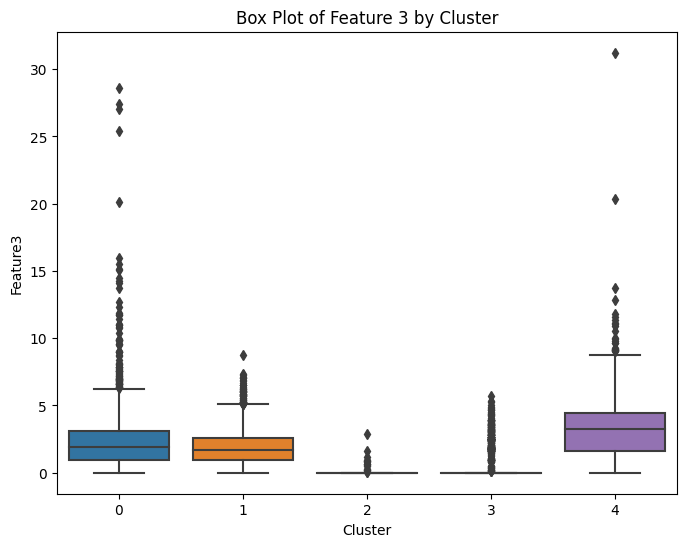

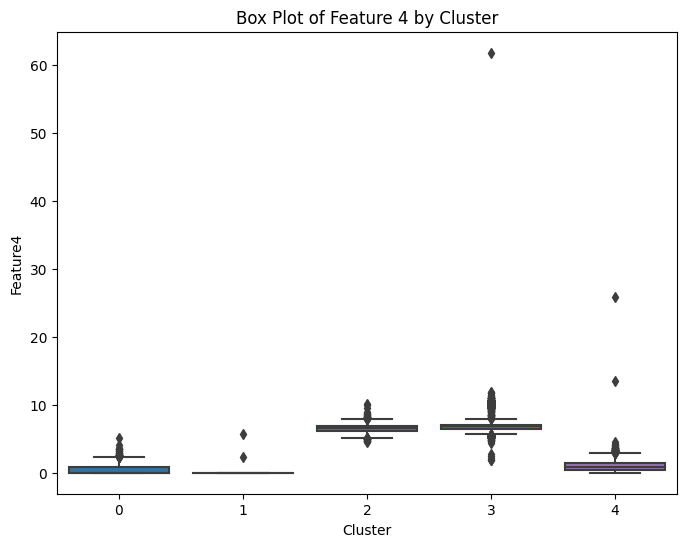

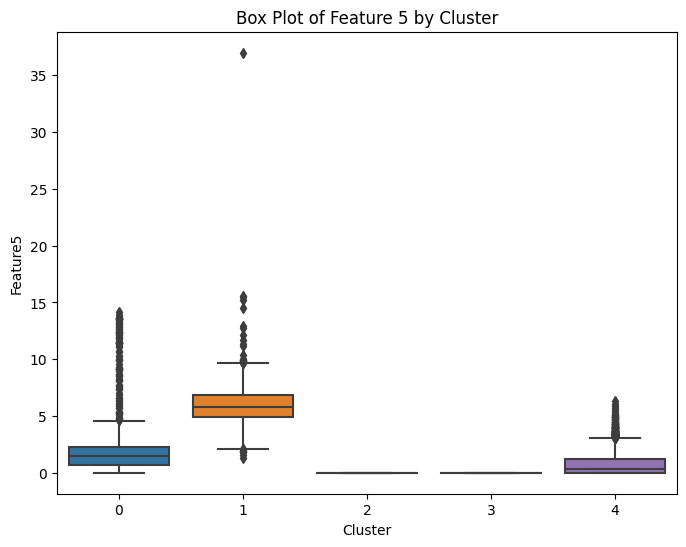

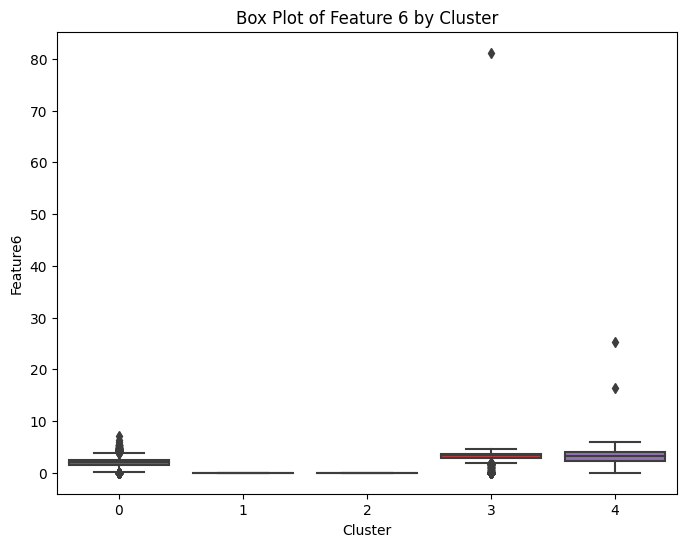

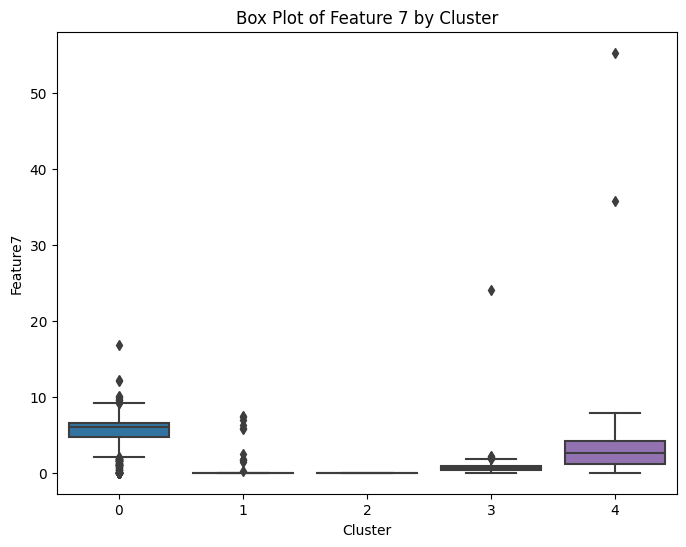

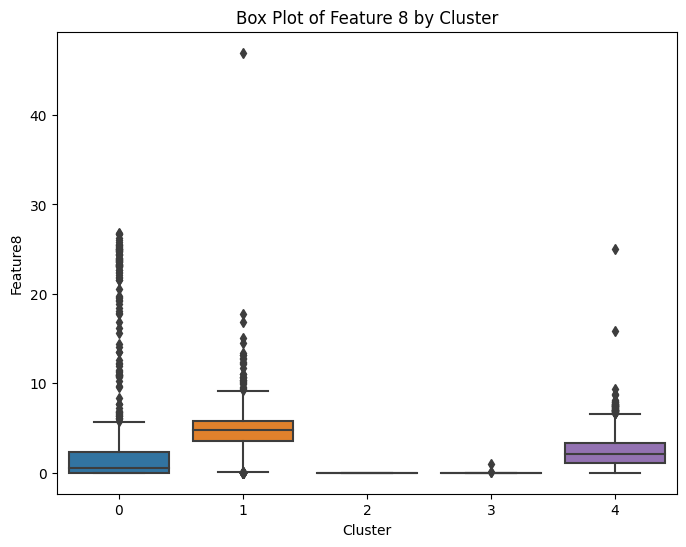

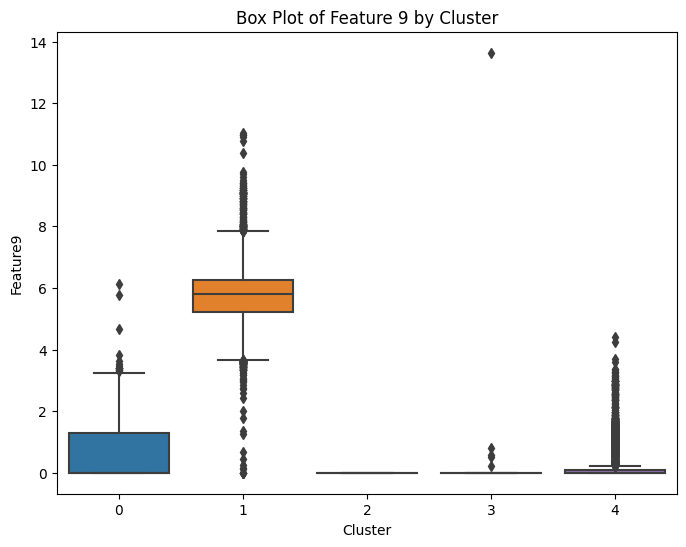

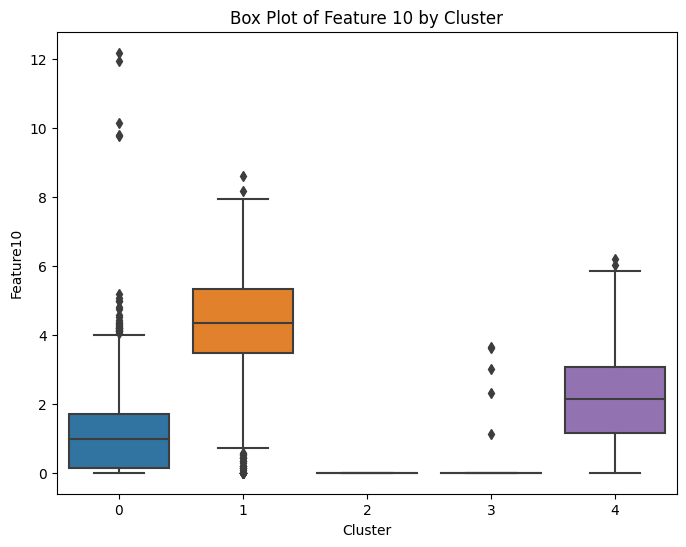

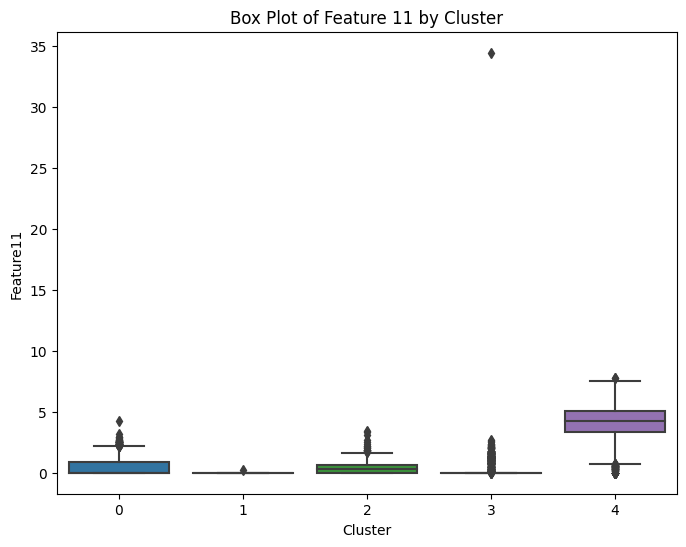

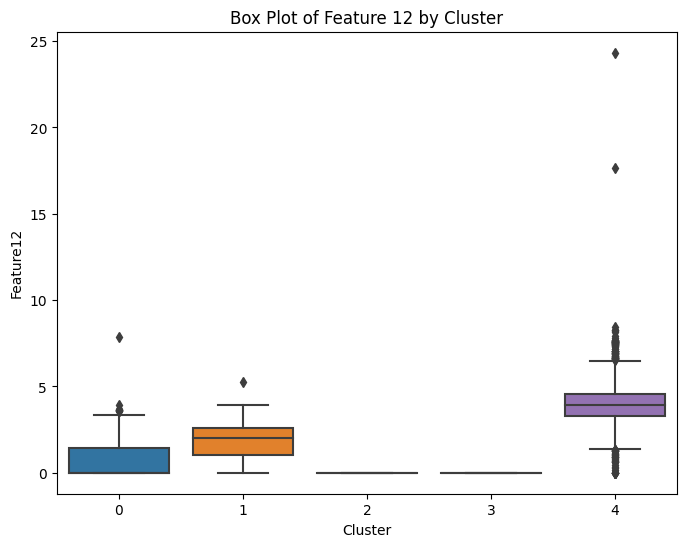

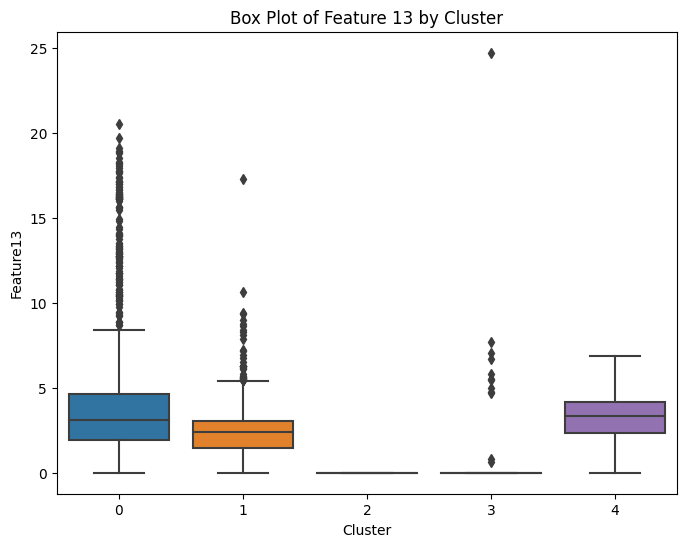

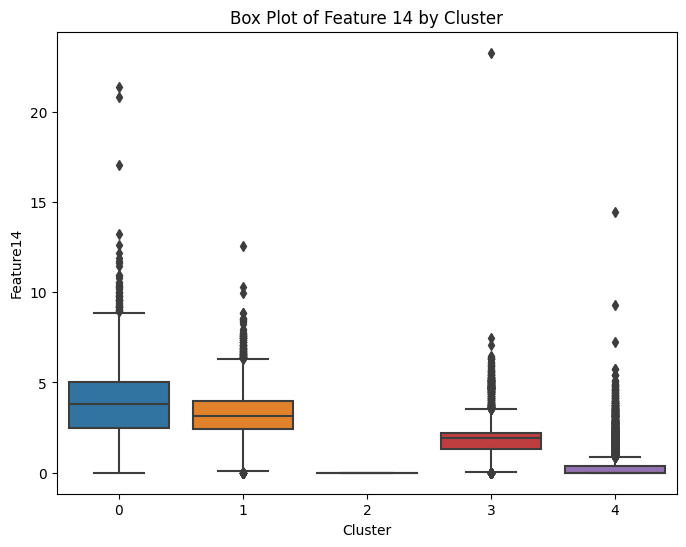

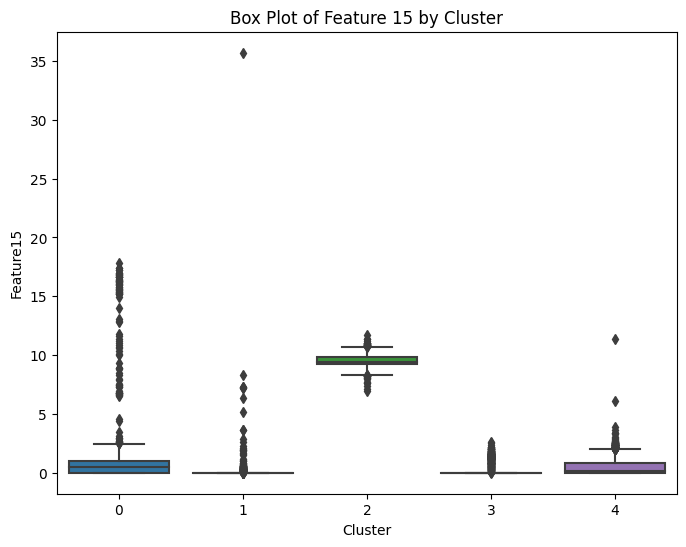

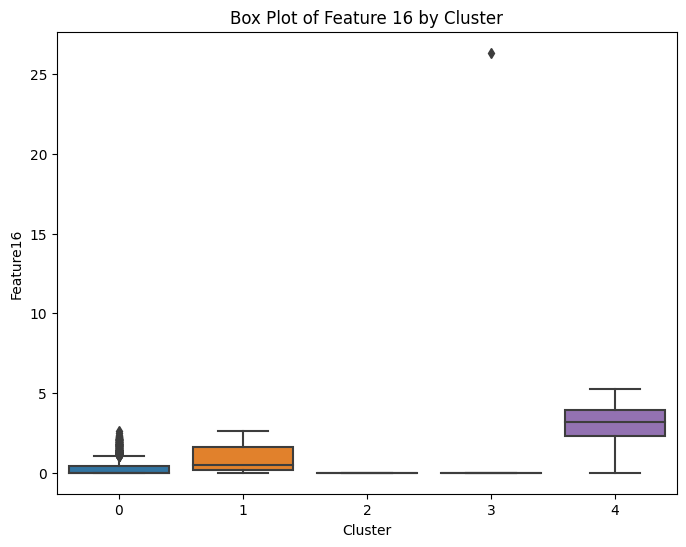

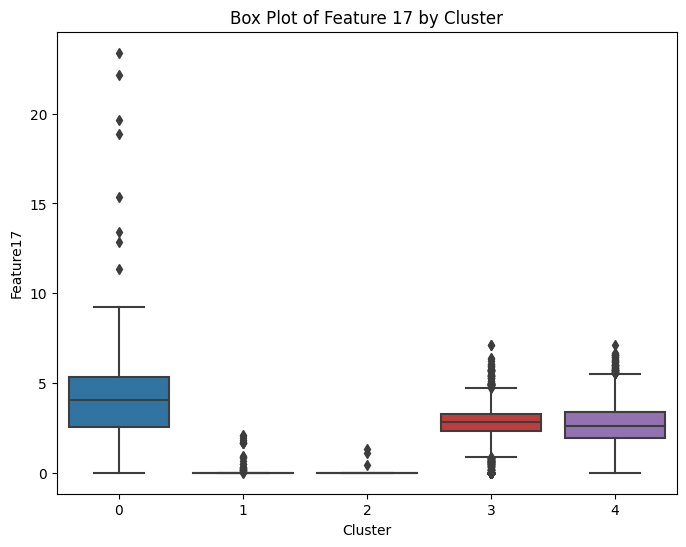

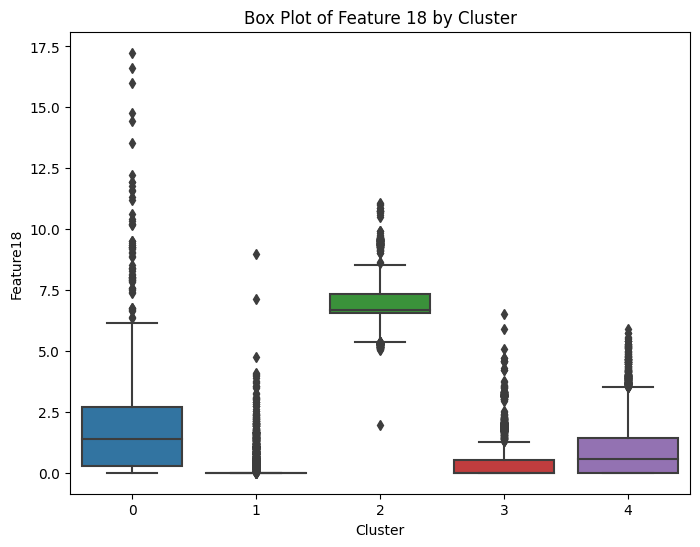

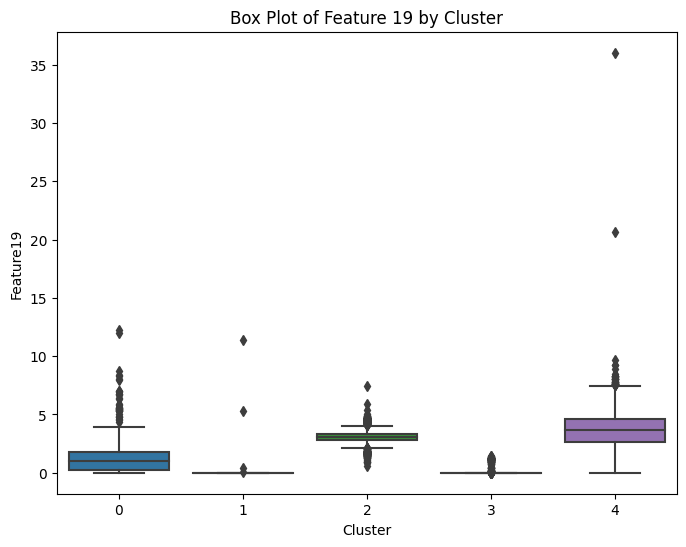

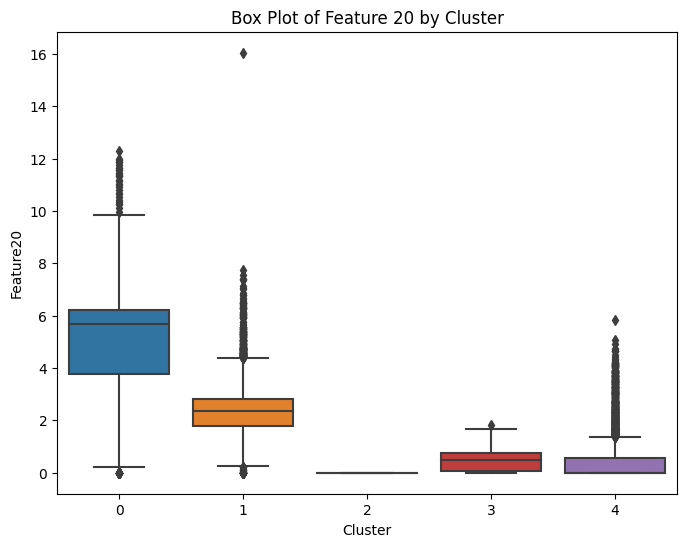

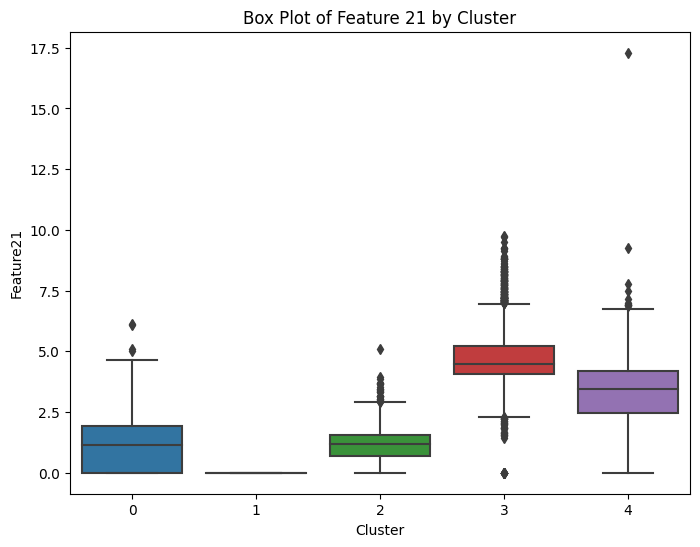

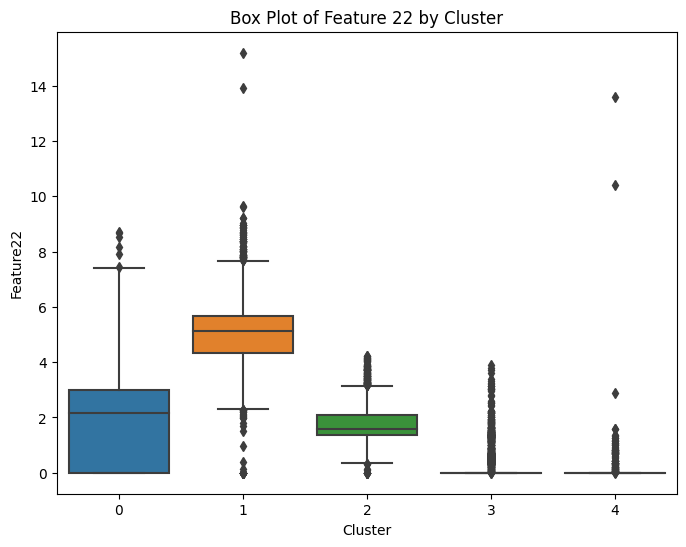

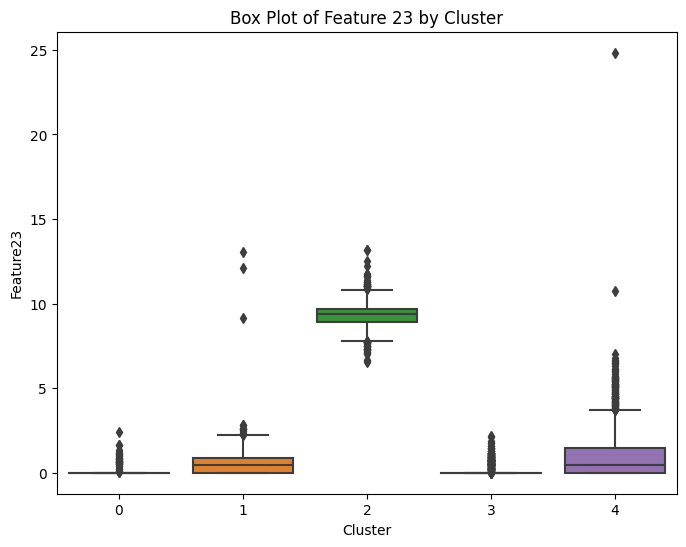

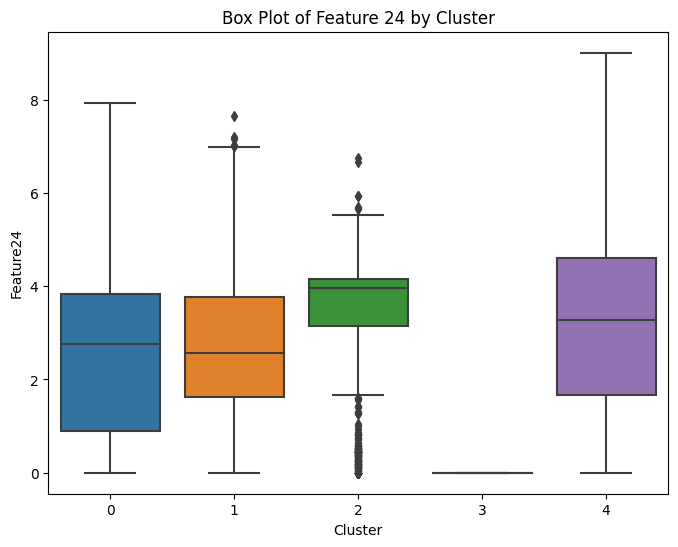

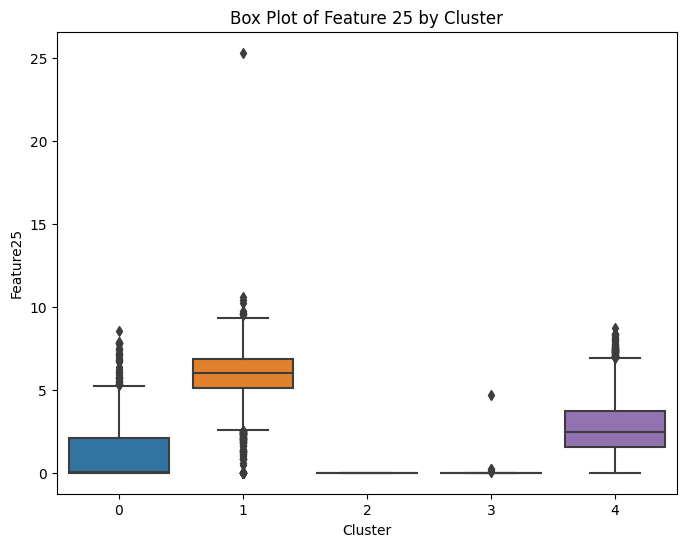

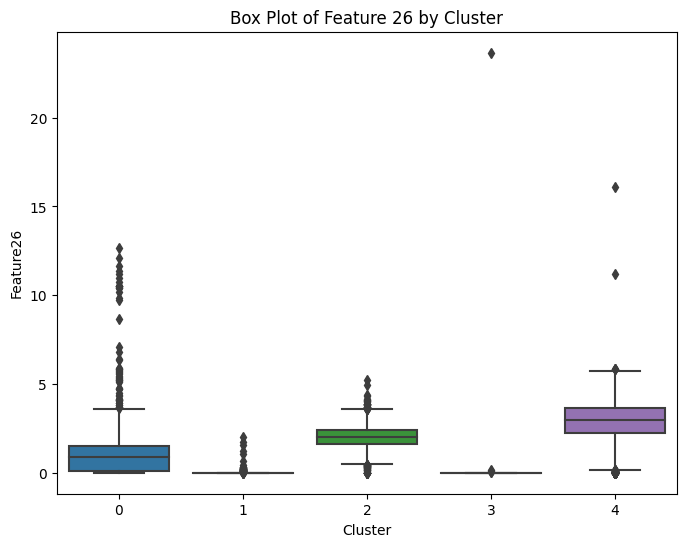

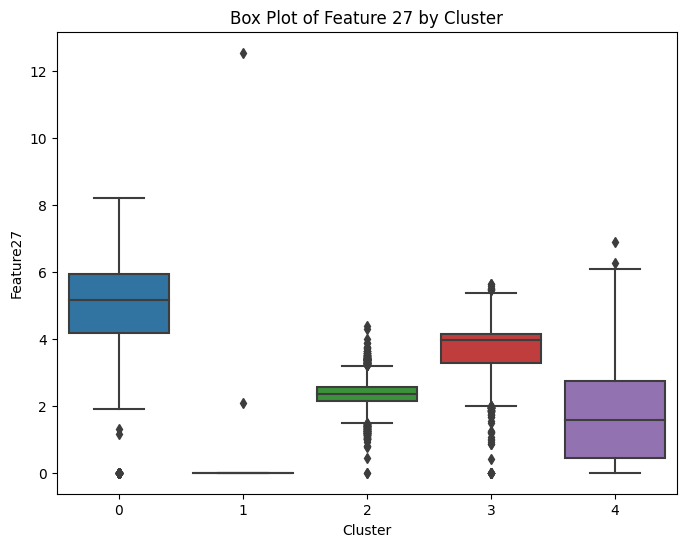

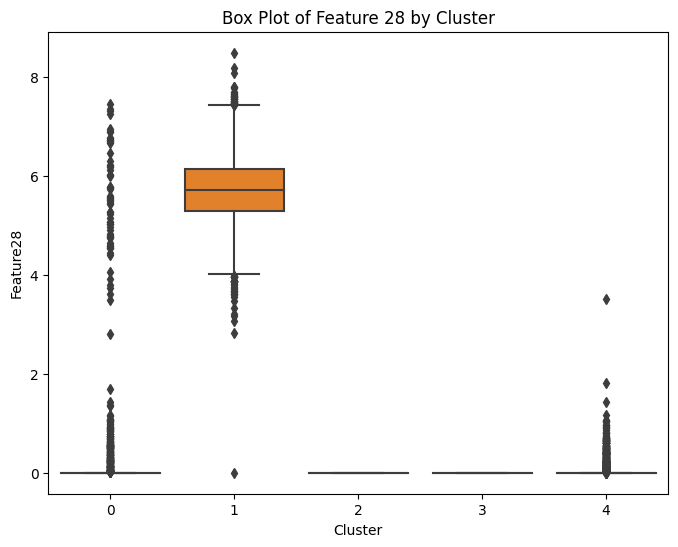

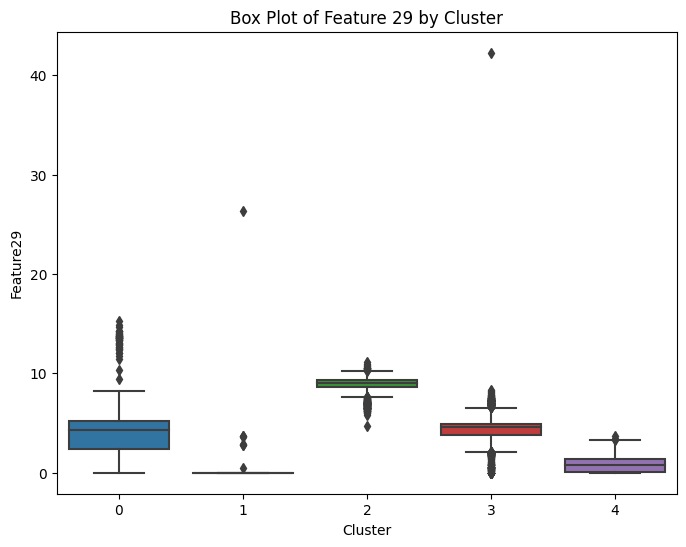

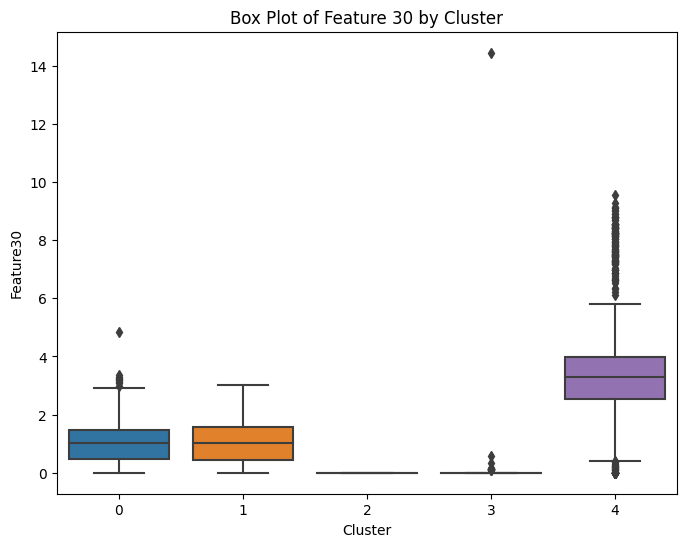

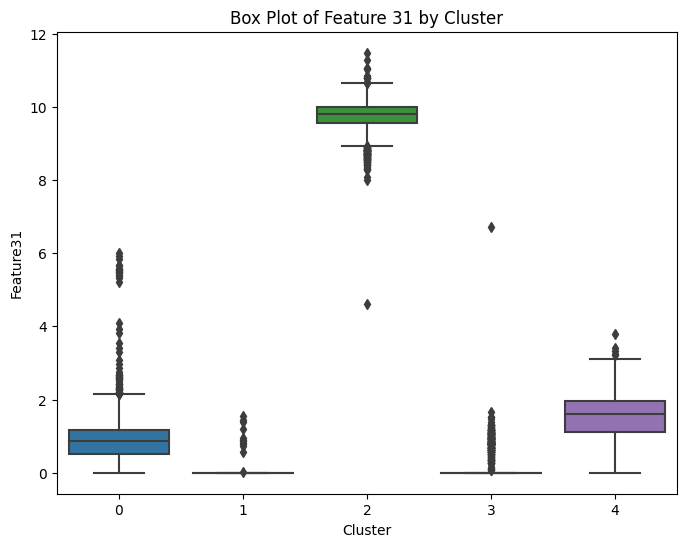

In [ ]:
# Plotting box plots for each feature per cluster
num_features = df_features.shape[1] - 1  # excluding the cluster label column
for i in range(num_features):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=f'Feature{i}', data=df_features)
    plt.title(f'Box Plot of Feature {i} by Cluster')
    plt.show()


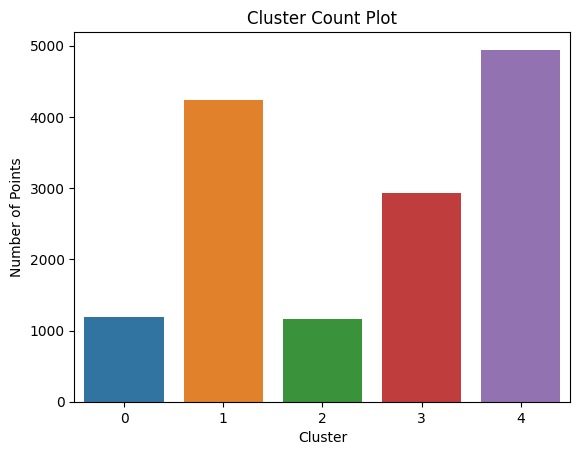

In [ ]:
# Count plot for cluster sizes
sns.countplot(x=clusters)
plt.title('Cluster Count Plot')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.show()


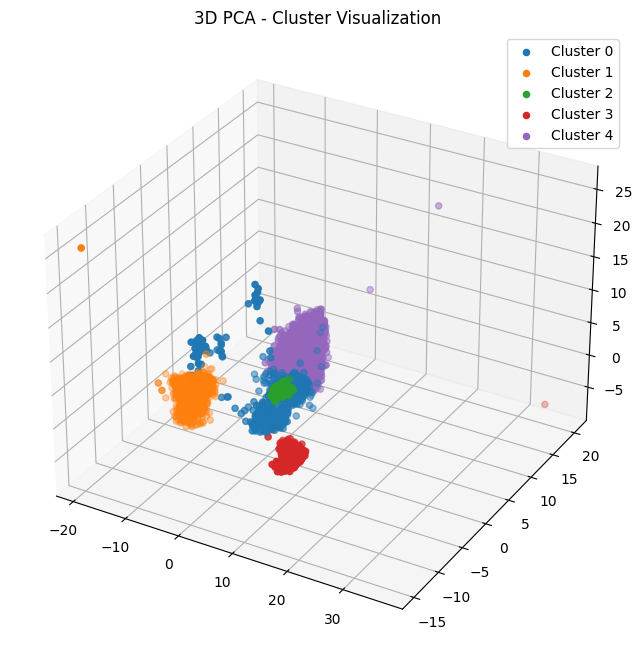

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Reducing to 3 dimensions using PCA
pca_3d = PCA(n_components=3)
pca_results_3d = pca_3d.fit_transform(features_anormal)

# Plotting 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cl in range(n_clusters):
    indices = clusters == cl
    ax.scatter(pca_results_3d[indices, 0], pca_results_3d[indices, 1], pca_results_3d[indices, 2], label=f'Cluster {cl}')
ax.legend()
plt.title('3D PCA - Cluster Visualization')
plt.show()
